In [24]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load the datasets
train_data = pd.read_csv('Sets/pca_time_freq/train_data_pca_time_freq.csv')
val_data = pd.read_csv('Sets/pca_time_freq/val_data_pca_time_freq.csv')

# Separate features and labels
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_val = val_data.drop(columns=['label'])
y_val = val_data['label']


param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

# Predict on validation set
val_predicted_labels_dt = best_dt_classifier.predict(X_val)
# Initialize the Decision Tree classifier
#dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
#dt_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
#val_predicted_labels_dt = dt_classifier.predict(X_val)

# Evaluate the accuracy of the model

print("Best parameters found: ", grid_search.best_params_)
print("Best max_depth: ", grid_search.best_params_['max_depth'])
print("Best min_samples_split: ", grid_search.best_params_['min_samples_split'])
print("Best min_samples_leaf: ", grid_search.best_params_['min_samples_leaf'])
print("Best criterion: ", grid_search.best_params_['criterion'])


accuracy = accuracy_score(y_val, val_predicted_labels_dt)
print(f'Validation set accuracy: {accuracy:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, val_predicted_labels_dt))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_predicted_labels_dt))



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best max_depth:  None
Best min_samples_split:  5
Best min_samples_leaf:  1
Best criterion:  entropy
Validation set accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       0.99      0.99      0.99       221
           2       0.98      0.97      0.98       505
           3       0.96      0.95      0.96       264
           4       0.94      0.97      0.95       270
           5       1.00      1.00      1.00       535
           6       0.99      0.98      0.99       384
           7       1.00      1.00      1.00       248

    accuracy                           0.99      2753
   macro avg       0.98      0.98      0.98      2753
weighted avg       0.99      0.99      0.99      2753


Confusion Matrix:

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best n_estimators:  150
Best max_depth:  20
Best min_samples_split:  2
Best min_samples_leaf:  1
Best bootstrap:  False
Validation set accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       527
           2       1.00      1.00      1.00      1299
           3       1.00      1.00      1.00       669
           4       1.00      1.00      1.00       635
           5       1.00      1.00      1.00      1347
           6       1.00      1.00      1.00       930
           7       1.00      1.00      1.00       617

    accuracy                           1.00      6884
   macro avg       1.00      1.00      1.00      6884
weighted avg       1.00      1.00     

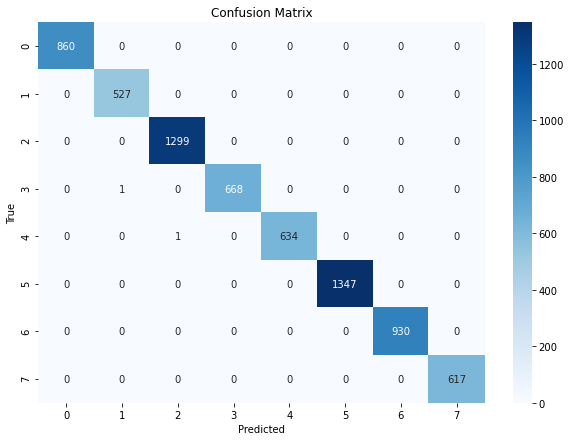

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('Sets/pca_time_freq/train_data_pca_time_freq.csv')
val_data = pd.read_csv('Sets/pca_time_freq/test_data_pca_time_freq.csv')

# Separate features and labels
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_val = val_data.drop(columns=['label'])
y_val = val_data['label']

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Predict on validation set
val_predicted_labels_rf = best_rf_classifier.predict(X_val)

# Initialize the Random Forest classifier
#rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
#rf_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
#val_predicted_labels_rf = rf_classifier.predict(X_val)

# Evaluate the accuracy of the model

print("Best parameters found: ", grid_search.best_params_)
print("Best n_estimators: ", grid_search.best_params_['n_estimators'])
print("Best max_depth: ", grid_search.best_params_['max_depth'])
print("Best min_samples_split: ", grid_search.best_params_['min_samples_split'])
print("Best min_samples_leaf: ", grid_search.best_params_['min_samples_leaf'])
print("Best bootstrap: ", grid_search.best_params_['bootstrap'])


accuracy = accuracy_score(y_val, val_predicted_labels_rf)
print(f'Validation set accuracy: {accuracy:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, val_predicted_labels_rf))

# Print confusion matrix
conf_matrix = confusion_matrix(y_val, val_predicted_labels_rf)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_train.unique()), yticklabels=sorted(y_train.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}
Best n_estimators:  150
Best learning_rate:  0.2
Best max_depth:  4
Validation set accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       527
           2       1.00      1.00      1.00      1299
           3       1.00      1.00      1.00       669
           4       1.00      1.00      1.00       635
           5       1.00      1.00      1.00      1347
           6       1.00      1.00      1.00       930
           7       1.00      1.00      1.00       617

    accuracy                           1.00      6884
   macro avg       1.00      1.00      1.00      6884
weighted avg       1.00      1.00      1.00      6884


Confusion Matrix:
[[ 860    0    0    0    0    0    0    0]
 [   0  527    0    

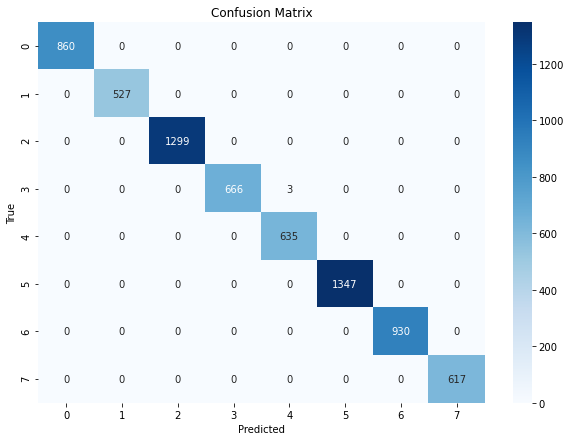

In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('Sets/pca_time_freq/train_data_pca_time_freq.csv')
val_data = pd.read_csv('Sets/pca_time_freq/test_data_pca_time_freq.csv')

# Separate features and labels
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_val = val_data.drop(columns=['label'])
y_val = val_data['label']

# Initialize the Gradient Boosting classifier
#gbm_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier on the training data
#gbm_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
#val_predicted_labels = gbm_classifier.predict(X_val)

param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_gbm_classifier = grid_search.best_estimator_
val_predicted_labels_gbm = best_gbm_classifier.predict(X_val)

print("Best parameters found: ", grid_search.best_params_)
print("Best n_estimators: ", grid_search.best_params_['n_estimators'])
print("Best learning_rate: ", grid_search.best_params_['learning_rate'])
print("Best max_depth: ", grid_search.best_params_['max_depth'])

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_val, val_predicted_labels_gbm)
print(f'Validation set accuracy: {accuracy:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, val_predicted_labels_gbm))

# Print confusion matrix
conf_matrix = confusion_matrix(y_val, val_predicted_labels_gbm)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_train.unique()), yticklabels=sorted(y_train.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def run_my_code(train_data, val_data, test_data):
    X_train = train_data.drop(columns=['label'])
    y_train = train_data['label']
    X_val = test_data.drop(columns=['label'])
    y_val = test_data['label']

    # The Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)
    val_predicted_labels_D = dt_classifier.predict(X_val)

    # The Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    val_predicted_labels_f = rf_classifier.predict(X_val)

    # The Gradient Boosting classifier
    gbm_classifier = GradientBoostingClassifier(random_state=42)
    gbm_classifier.fit(X_train, y_train)
    val_predicted_labels_gbm = gbm_classifier.predict(X_val)

    result = [y_val, val_predicted_labels_D, val_predicted_labels_f, val_predicted_labels_gbm]
    return result

def load_datasets(subfolder_path, subfolder):
    train_data_path = os.path.join(subfolder_path, f'train_data_{subfolder}.csv')
    val_data_path = os.path.join(subfolder_path, f'val_data_{subfolder}.csv')
    test_data_path = os.path.join(subfolder_path, f'test_data_{subfolder}.csv')
    
    train_data = pd.read_csv(train_data_path)
    val_data = pd.read_csv(val_data_path)
    test_data = pd.read_csv(test_data_path)
    
    return train_data, val_data, test_data

def process_datasets(main_folder):
    types = ['DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)
        if os.path.isdir(subfolder_path):
            print(f"Processing folder: {subfolder}")
            train_data, val_data, test_data = load_datasets(subfolder_path, subfolder)
            result = run_my_code(train_data, val_data, test_data)
            for i in range(1, len(result)):
                accuracy = accuracy_score(result[0], result[i])
                print(f'Validation set accuracy {types[i-1]}: {accuracy:.2f}')

                # Print classification report
                print("\nClassification Report:")
                print(classification_report(result[0], result[i]))

            print("-" * 60)

# Example usage
main_folder = 'Sets'  # Replace with your actual path
process_datasets(main_folder)


Processing folder: org
Validation set accuracy DecisionTreeClassifier: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       826
           1       0.70      0.72      0.71       535
           2       0.79      0.78      0.79      1321
           3       0.68      0.62      0.65       694
           4       0.61      0.65      0.63       654
           5       1.00      1.00      1.00      1348
           6       0.88      0.89      0.88       914
           7       0.90      0.90      0.90       639

    accuracy                           0.83      6931
   macro avg       0.80      0.80      0.80      6931
weighted avg       0.83      0.83      0.83      6931

Validation set accuracy RandomForestClassifier: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       826
           1       0.85      0.84      0.85       535
         